# Autovalores, autovectores, polinomio caracteristico, diagonalización

| Librería | Función | Explicación |
| --- | --- | --- |
| numpy | numpy.linalg.eig | Calcula los autovalores y autovectores derechos de una matriz cuadrada |
| numpy | numpy.linalg.eigh | Calcula los autovalores y autovectores de una matriz hermítica compleja o simétrica real |
| numpy | numpy.poly | Calcula el polinomio característico de una matriz |
| sympy | sympy.Matrix.eigenvals | Calcula los autovalores de una matriz simbólica |
| sympy | sympy.Matrix.eigenvects | Calcula los autovalores y autovectores de una matriz simbólica |
| sympy | sympy.Matrix.charpoly | Calcula el polinomio característico de una matriz simbólica |

Calcular el polinomio caracteristico, los  autovalores y autvectores propios de la siguiente matrices, comprobar con la solucion analitica:

1. 

\begin{bmatrix}
    1 & -1 & 4 \\
    3 & 2 & -1 \\
    2 & 1 & -1
\end{bmatrix}


2. 

\begin{bmatrix}
    3 & -5 \\
    1 & -1 \\
\end{bmatrix}

In [19]:
import sympy as sp
import numpy as np                                 
import matplotlib.pyplot as plt 

In [20]:
#1 
M1 = sp.Matrix([[1, -1, 4], [3, 2, -1], [2, 1, -1]])
M1

Matrix([
[1, -1,  4],
[3,  2, -1],
[2,  1, -1]])

In [21]:
#polinomio caracteristico
sp.factor(M1.charpoly().as_expr())

(lambda - 3)*(lambda - 1)*(lambda + 2)

In [22]:
#Autovalores 
M1.eigenvals()

{3: 1, 1: 1, -2: 1}

In [23]:
#autovalores 
M1.eigenvects()

[(-2,
  1,
  [Matrix([
   [-1],
   [ 1],
   [ 1]])]),
 (1,
  1,
  [Matrix([
   [-1],
   [ 4],
   [ 1]])]),
 (3,
  1,
  [Matrix([
   [1],
   [2],
   [1]])])]

In [24]:
M2 = sp.Matrix([[3, -5],[1,-1]])
M2

Matrix([
[3, -5],
[1, -1]])

In [25]:
#polinomio caracteristico
sp.factor(M2.charpoly().as_expr())

lambda**2 - 2*lambda + 2

In [26]:
#Autovalores 
M2.eigenvals()

{1 - I: 1, 1 + I: 1}

In [27]:
#autovalores 
M2.eigenvects()

[(1 - I,
  1,
  [Matrix([
   [2 - I],
   [    1]])]),
 (1 + I,
  1,
  [Matrix([
   [2 + I],
   [    1]])])]

Actividad 2. 

Considere la ecuación cuadrática $x^2-4xy+3y=6$, esta ecuación cuadrática se corresponde a una hiperbola, la cual puede ser escrita en forma matricial como sigue:

$A\vec{v} \cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica, 

\begin{equation}
A=\begin{bmatrix}
1 & -2 \\
-2 & 3 \\
\end{bmatrix}
\end{equation}

1. Realice un grafico que represente la hyperbola

- Diagonalice A, para ello construya la matrix Q de autovectores ortoganales 
tal que $D=Q^{T}AQ$, en este caso se dice que A es diagonalizable ortogonalmente, donde $A=QDQ^T$.

- Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una  nueva base

\begin{equation}
QDQ^T \vec{v} \cdot \vec{v} = d
\end{equation}


\begin{equation}
Q(DQ^T\vec{v}) \cdot \vec{v} = (DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


\begin{equation}
(DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


Sea $u=Q^T\vec{v}$

Luego :


\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola 

In [28]:
f = lambda x,y : x**2 - 4*x*y + 3*y - 6 

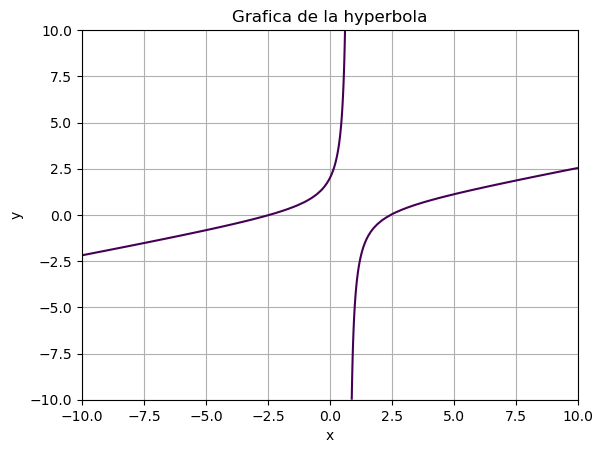

In [29]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

X,Y = np.meshgrid(x,y)

plt.contour(X,Y,f(X,Y),levels = [0])
plt.title('Grafica de la hyperbola')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [30]:
A = sp.Matrix([[1, -2], [-2, 3]])
A

Matrix([
[ 1, -2],
[-2,  3]])

In [31]:
A = np.array(A).astype(np.float64)
A

array([[ 1., -2.],
       [-2.,  3.]])

In [32]:
# Encontrar los autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)

In [33]:
#Construimos la matriz ortogonal de autovectores Q 

Q = np.hstack((autovectores[:,0].reshape(2,1), autovectores[:,1].reshape(2,1)))
Q

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

In [34]:
#Construimos la matriz diagonal de autovalores D
D = Q.T @ A @ Q
D

array([[-2.36067977e-01, -3.48462032e-16],
       [-3.10277310e-16,  4.23606798e+00]])

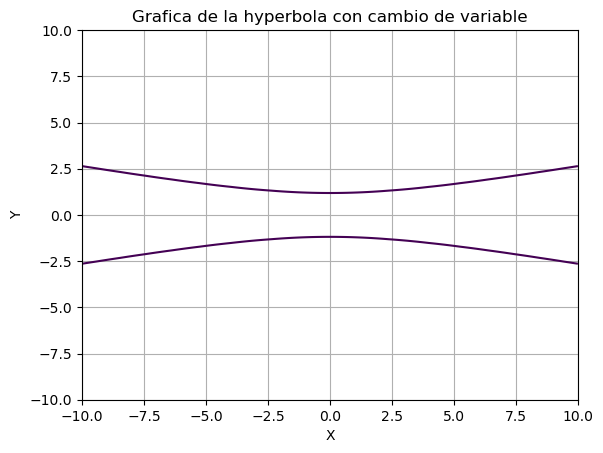

In [39]:
#Construimos la ecuacion de la hipérbola D*u*u = 6 , donde u = (x,y)]
x = sp.Symbol('x')
y = sp.Symbol('y')
u = sp.Matrix([x,y])

f = (D@u).dot(u) - 6 
f.simplify()
f = sp.lambdify((x,y),f)

#Graficamos la hipérbola
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

X,Y = np.meshgrid(x,y)

plt.contour(X,Y,f(X,Y),levels = [0])
plt.title('Grafica de la hyperbola con cambio de variable')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()
